In [20]:
# import hdf5 viewer

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import ticker
from numpy import fft as fft

In [21]:
with h5py.File(
    r"C:\Users\Adrian\Documents\fus_instruments_repos\summer_2024\testpad\transducer\612_T550H825_sweep_550kHz_01.hdf5"
) as f:
    scan_group = f["Scan"]

    raw_pressure_waveforms = scan_group["Raw pressure waveforms (Pa)"][:]

    print(raw_pressure_waveforms.shape)

    # print the header of the file

    # store data in a pandas dataframe
    df = pd.DataFrame(raw_pressure_waveforms)
    print(df[0].head())

(74, 10000)
0   -5168.424320
1     110.248830
2    -290.934413
3   -3876.573446
4   -2027.353486
Name: 0, dtype: float64


In [22]:
# create a numpy array to match the length of raw pressure wave form at 16 ns intervals
time = np.arange(0, 16 * raw_pressure_waveforms.shape[1], 16) / 1e6

# print first few values of time
print(time[:10])

[0.00e+00 1.60e-05 3.20e-05 4.80e-05 6.40e-05 8.00e-05 9.60e-05 1.12e-04
 1.28e-04 1.44e-04]


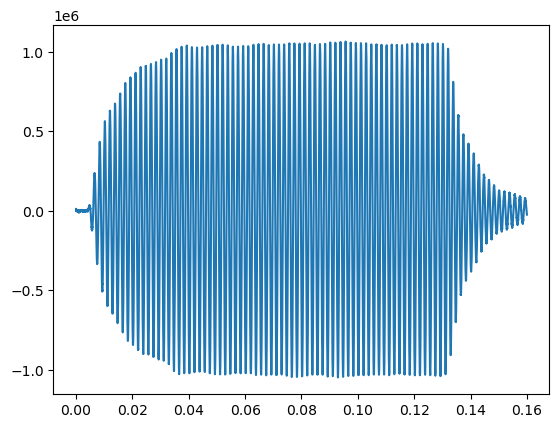

In [23]:
# plot a waveform
plt.figure()
plt.plot(time, raw_pressure_waveforms[73].T)

In [24]:
# in raw_pressure_waveform, find the row with the highest average value
average_waveform = np.mean(raw_pressure_waveforms, axis=1)
max_index = np.argmax(average_waveform)
print(max_index)

4


In [25]:
# find the row with the highest peak value
peak_waveform = np.max(raw_pressure_waveforms, axis=1)
max_index_peak = np.argmax(peak_waveform)
print(max_index_peak)

73


In [26]:
raw_pressure_waveforms.shape[1]

10000

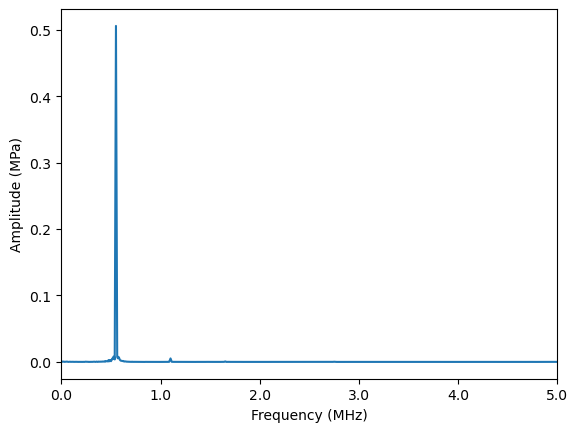

In [ ]:
num_fft_pts = raw_pressure_waveforms.shape[1]
time_dt = 16e-9
window_fft = np.hanning(num_fft_pts)

windowed_data = raw_pressure_waveforms * window_fft

real_fft_magnitude = np.fft.rfft(raw_pressure_waveforms[73] * window_fft, axis=0)

fft_wf = np.abs(2 * 2 * real_fft_magnitude / num_fft_pts) / 1e6
fft_freq_MHz = np.fft.rfftfreq(n=num_fft_pts, d=time_dt) / 1e6


plt.plot(fft_freq_MHz, fft_wf.T)
plt.xlim(0, 5)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Amplitude (MPa)")
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
plt.show()